<a href="https://colab.research.google.com/github/Rogerio-mack/game_analysis/blob/main/ANOVA_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [10]:
dfs = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Skate.xlsx')
dfs = dfs.iloc[:,range(0,4)]
dfs['device'] = 'skate'
dfs.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


In [11]:
dfj = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Joystick.xlsx')
dfj = dfj.iloc[:,range(0,4)]
dfj['device'] = 'joystick'
dfj.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,0,5.73,5.73,joystick
1,21505616,0,3.23,8.96,joystick
2,21505616,0,3.49,12.45,joystick
3,32143621,5,22.94,22.94,joystick
4,32143621,9,18.03,40.97,joystick


In [12]:
dfk = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/Teclado.xlsx')
dfk = dfk.iloc[:,range(0,4)]
dfk['device'] = 'keyboard'
dfk.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,1,8.94,8.94,keyboard
1,21505616,1,3.51,12.45,keyboard
2,21505616,2,7.01,19.46,keyboard
3,32143621,34,124.45,124.45,keyboard
4,32143621,34,3.51,127.96,keyboard


In [13]:
df = pd.concat([dfs, dfj, dfk])
df.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device
0,21505616,2,12.44,12.44,skate
1,21505616,13,42.01,54.45,skate
2,21505616,26,49.09,103.54,skate
3,32143621,0,5.45,5.45,skate
4,32143621,3,13.99,19.44,skate


# Data Exploration

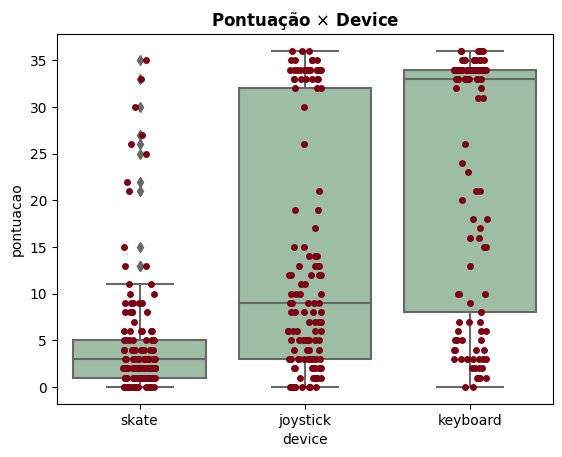

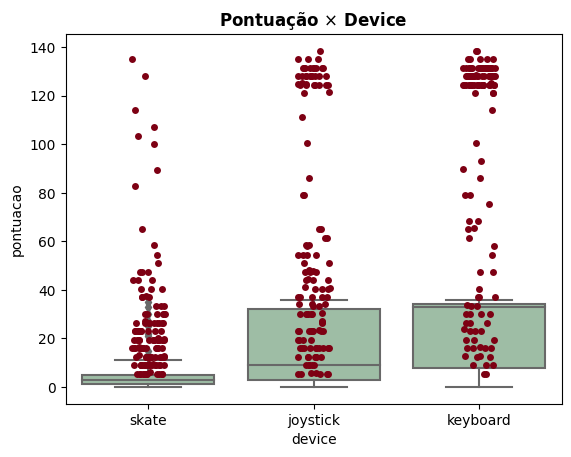

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='device', y='pontuacao', data=df, color='#99c2a2') #, meanprops={"markersize":200})
# ax = sns.swarmplot(x='device', y='pontuacao', data=df, color='#7d0013')
ax = sns.stripplot(x='device', y='pontuacao', data=df, color='#7d0013')
ax.set_title('Pontuação $\\times$ Device',weight='bold')
plt.show()

ax = sns.boxplot(x='device', y='pontuacao', data=df, color='#99c2a2') #, meanprops={"markersize":200})
# ax = sns.swarmplot(x='device', y='pontuacao', data=df, color='#7d0013')
ax = sns.stripplot(x='device', y='tempo_total', data=df, color='#7d0013')
ax.set_title('Pontuação $\\times$ Device',weight='bold')
plt.show()

# **ANOVA**, *jogadas*

* *Device* $\rightarrow$ *Pontuação* ? ***Sim***
* *Device* $\rightarrow$ *Tempo Total* ?  ***Sim***

In [31]:
from scipy.stats import f_oneway

# ANOVA para device
f_stat, p_value = f_oneway(df[df['device'] == 'skate']['pontuacao'],
                           df[df['device'] == 'joystick']['pontuacao'],
                           df[df['device'] == 'keyboard']['pontuacao'])
if p_value < 0.05:
    print(f"O tipo de Device influencia na Pontuação. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")



O tipo de Device influencia na Pontuação. f-stat = 89.362801 p-value = 0.000000


In [32]:
# ANOVA para device
f_stat, p_value = f_oneway(df[df['device'] == 'skate']['tempo_total'],
                           df[df['device'] == 'joystick']['tempo_total'],
                           df[df['device'] == 'keyboard']['tempo_total'])
if p_value < 0.05:
    print(f"O tipo de Device influencia no Tempo Total. f-stat = {f_stat:.6f} p-value = {p_value:.6f}")

O tipo de Device influencia no Tempo Total. f-stat = 86.568091 p-value = 0.000000


In [37]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('pontuacao ~ C(device)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(device),23560.000878,2.0,89.362801,1.238349e-32
Residual,51015.188865,387.0,NaN,NaN


In [39]:
# Ordinary Least Squares (OLS) model
model = ols('tempo_total ~ C(device)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(device),288611.609060,2.0,86.568091,8.457750e-32
Residual,645114.677474,387.0,NaN,NaN


In [29]:
from scipy.stats import kruskal

# Teste de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(*[group['pontuacao'] for name, group in df.groupby('device')])
if kruskal_p_value < 0.05:
    print(f"O tipo de Device influencia na Pontuação. kruskal_p_value é de {p_value:.4f}")

kruskal_stat, kruskal_p_value = kruskal(*[group['tempo_total'] for name, group in df.groupby('device')])
if kruskal_p_value < 0.05:
    print(f"O tipo de Device influencia no Tempo Total. kruskal_p_value é de {p_value:.4f}")

O tipo de Device influencia na Pontuação. kruskal_p_value é de 0.0000
O tipo de Device influencia no Tempo Total. kruskal_p_value é de 0.0000


# **ANOVA**, *perfil dos jogadores*

* *Frequência de uso de Skate* $\rightarrow$ *Pontuação* ? ***Não***
* *Gênero* $\rightarrow$ *Pontuação* ?  ***Sim***

In [59]:
dfu = pd.read_excel('https://github.com/Rogerio-mack/game_analysis/raw/main/data/DadosUsabilidade.xlsx')
dfu.head()

,Carimbo de data/hora,TIA,Data de nascimento,Gênero,Frequência que anda de skate,Frequência que usa jogos de computador,Frequência que usa jogos de console (Xbox / Playstation / Wii),Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet),Gênero de jogo preferido
0,2023-08-21 16:47:52.279,42118816,2003-06-07,Feminino,Nunca,Regularmente (algumas vezes por semana),Regularmente (algumas vezes por semana),Nunca,"Ação e aventura, RPG, Simulação, Corrida, Estr..."
1,2023-08-22 13:49:56.703,42145333,2000-11-26,Masculino,Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),Regularmente (algumas vezes por semana),"Ação e aventura, RPG, Estratégia"
2,2023-08-22 14:15:17.455,42326321,2004-11-29,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Raramente (algumas vezes por ano),Raramente (algumas vezes por ano),Esporte
3,2023-08-22 14:40:49.151,32339623,2004-07-13,Masculino,Nunca,Frequente (todos os dias),Regularmente (algumas vezes por semana),Raramente (algumas vezes por ano),"Ação e aventura, RPG, Estratégia, MOBA"
4,2023-08-22 15:08:53.471,42305535,2005-09-09,Masculino,Nunca,Ocasionalmente (algumas vezes por mês),Nunca,Ocasionalmente (algumas vezes por mês),RPG


In [62]:
df = df.merge(dfu, how='inner', left_on='RA', right_on='TIA')
df.head()

,RA,pontuacao,tempo_obstaculo,tempo_total,device,Carimbo de data/hora,TIA,Data de nascimento,Gênero,Frequência que anda de skate,Frequência que usa jogos de computador,Frequência que usa jogos de console (Xbox / Playstation / Wii),Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet),Gênero de jogo preferido
0,21505616,2,12.44,12.44,skate,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
1,21505616,13,42.01,54.45,skate,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
2,21505616,26,49.09,103.54,skate,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
3,21505616,0,5.73,5.73,joystick,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
4,21505616,0,3.23,8.96,joystick,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG


In [63]:
df.columns

Index(['RA', 'pontuacao', 'tempo_obstaculo', 'tempo_total', 'device',
       'Carimbo de data/hora', 'TIA', 'Data de nascimento', 'Gênero',
       'Frequência que anda de skate',
       'Frequência que usa jogos de computador',
       'Frequência que usa jogos de console (Xbox / Playstation / Wii)',
       'Frequência que usa jogos em dispositivos móveis (smartphone e/ou tablet)',
       'Gênero de jogo preferido'],
      dtype='object')

In [64]:
df.columns = ['TIA', 'pontuacao', 'tempo_obstaculo', 'tempo_total', 'device',
       'data_hora', 'TIA_check', 'data_nasc', 'genero',
       'fskate',
       'fcomputer_games',
       'fconsole_games',
       'fmovel_games',
       'game_preference']

df.head()

,TIA,pontuacao,tempo_obstaculo,tempo_total,device,data_hora,TIA_check,data_nasc,genero,fskate,fcomputer_games,fconsole_games,fmovel_games,game_preference
0,21505616,2,12.44,12.44,skate,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
1,21505616,13,42.01,54.45,skate,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
2,21505616,26,49.09,103.54,skate,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
3,21505616,0,5.73,5.73,joystick,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG
4,21505616,0,3.23,8.96,joystick,2023-09-04 16:54:30.527,21505616,1968-12-25,Masculino,Nunca,Nunca,Nunca,Nunca,RPG


In [65]:
df.game_preference.value_counts()

Ação e aventura, RPG                                                     33
RPG                                                                      18
RPG, Puzzle, Estratégia                                                  18
Ação e aventura, Simulação                                               18
Ação e aventura                                                          18
Ação e aventura, Corrida, Esporte                                        18
Ação e aventura, Estratégia                                              18
Ação e aventura, RPG, Puzzle, Estratégia                                 18
Ação e aventura, Esporte                                                 18
Ação e aventura, RPG, Simulação                                          12
Ação e aventura, Simulação, Estratégia                                    9
Ação e aventura, RPG, Puzzle, Simulação                                   9
Corrida                                                                   9
RPG, Simulaç

In [66]:
df.fskate.value_counts()

Nunca                                      228
Raramente (algumas vezes por ano)          132
Regularmente (algumas vezes por semana)      9
Name: fskate, dtype: int64

In [79]:
# Ordinary Least Squares (OLS) model
model = ols('pontuacao ~ C(fskate)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

if anova_table.loc[ 'C(fskate)', 'PR(>F)' ] < 0.05:
    print(f"A fskate influencia na Pontuação. f-stat = {anova_table.loc[ 'C(fskate)', 'F' ]:.6f} p-value = {anova_table.loc[ 'C(fskate)', 'PR(>F)' ]:.6f}")
else:
    print(f"A fskate não influencia na Pontuação. f-stat = {anova_table.loc[ 'C(fskate)', 'F' ]:.6f} p-value = {anova_table.loc[ 'C(fskate)', 'PR(>F)' ]:.6f}")


,sum_sq,df,F,PR(>F)
C(fskate),667.608466,2.0,1.72909,0.178892
Residual,70657.031100,366.0,NaN,NaN


A fskate não influencia na Pontuação. f-stat = 1.729090 p-value = 0.178892


In [81]:
model = ols('pontuacao ~ C(genero)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

if anova_table.loc[ 'C(genero)', 'PR(>F)' ] < 0.05:
    print(f"A genero influencia na Pontuação. f-stat = {anova_table.loc[ 'C(genero)', 'F' ]:.6f} p-value = {anova_table.loc[ 'C(genero)', 'PR(>F)' ]:.6f}")
else:
    print(f"A genero não influencia na Pontuação. f-stat = {anova_table.loc[ 'C(genero)', 'F' ]:.6f} p-value = {anova_table.loc[ 'C(genero)', 'PR(>F)' ]:.6f}")


,sum_sq,df,F,PR(>F)
C(genero),2897.171267,1.0,15.538524,0.000097
Residual,68427.468299,367.0,NaN,NaN


A genero influencia na Pontuação. f-stat = 15.538524 p-value = 0.000097


# **Regressão Linear**, *jogo $\times$ perfil dos jogadores*

* *Gênero x Device* $\rightarrow$ *Pontuação* ? ***Não***
* *fskate x Device* $\rightarrow$ *Pontuação* ?  ***Sim***

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Regressão considerando ambos os fatores
model = ols('pontuacao ~ device + genero + device:genero', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              pontuacao   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     41.46
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.01e-33
Time:                        19:34:58   Log-Likelihood:                -1411.5
No. Observations:                 369   AIC:                             2835.
Df Residuals:                     363   BIC:                             2858.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Regressão considerando ambos os fatores
model = ols('pontuacao ~ device + fskate + device:fskate', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pontuacao   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     24.00
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.70e-29
Time:                        19:36:08   Log-Likelihood:                -1416.0
No. Observations:                 369   AIC:                             2850.
Df Residuals:                     360   BIC:                             2885.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------